# Weight Initialization in Deep Network
When we have a huge amounts of Weights, is natral that Z would be really big.

z=$W_{[1]}X_{[1]}+W_{[2]}X_{[2]}+W_{[3]}X_{[3]}+..W_{[n]}X_{[n]}$
To  keep z value small we need to use smaller W. Therefore, it is better when the variance of W is eqoual to 1/n .
The solution would be that when we initialize the $W^{[l]}$  with  for example random numbers, we multiply that with specific factors.

For example:

For Relu function:    np.random.randn(shape) * np. sqrt(2/$n^{[l-1]}$)

For tanh function:    np.random.randn(shape) * np. sqrt(1/$n^{[l-1]}$)

For He/ Xavier function: np.random.randn(shape) * np. sqrt(2/$(n^{[l-1]}+n^{[l]})$)

In this excersize we want to investigate the effect of initialization methodes to the final results of Neural Networks.  Optimized initialization can speed up the gradient descent optimization process and reduce the error. 



# Dataset





# Computational Details
We have included the sigmoid, relu, compute_loss, forward_propagation, backward_propagation functions in the separate functional which is available at the same directory.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from functions import sigmoid, relu, compute_loss, forward_propagation, backward_propagation, update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec


# Visulization of the data


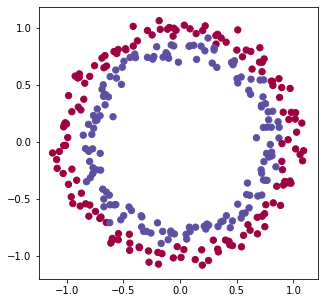

In [55]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'Purples'

np.random.seed(1)
train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
np.random.seed(2)
test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
# Visualize the data
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
train_X = train_X.T
train_Y = train_Y.reshape((1, train_Y.shape[0]))
test_X = test_X.T
test_Y = test_Y.reshape((1, test_Y.shape[0]))




In [56]:
# GRADED FUNCTION: Three layer model wit 10 and 5 hidden layer: X.shape[0],10,5,1

def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost=True, initialization = "he"):
  

    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    layers_dims = [X.shape[0], 10, 5, 1] 
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    if initialization ==  "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization ==  "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization ==  "he":
        parameters = initialize_parameters_he(layers_dims)
    
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [57]:
## Zero initialization
def initialize_parameters_zeros(layers_dims):    
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


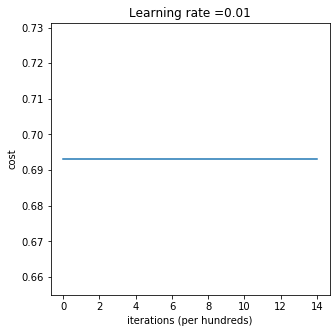

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [58]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

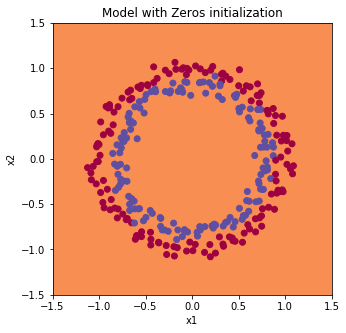

In [59]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

# Breaking the symmetry of W
When we use zero for all W, each neuron in each layer will learn the same think. We have to break the symmetry to train W with different values

# Random initialization with 15000 iterations

In [60]:
## Zero initialization
def initialize_parameters_random(layers_dims):    
    np.random.seed(3)  
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

C:\Users\Hamid\Documents\2019\@andrew\ver2\deep2\deep-learning-specialization-coursera-master\02-Improving-Deep-Neural-Networks\week1\Programming-Assignments\Initialization\functions.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\Hamid\Documents\2019\@andrew\ver2\deep2\deep-learning-specialization-coursera-master\02-Improving-Deep-Neural-Networks\week1\Programming-Assignments\Initialization\functions.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6235719528716395
Cost after iteration 2000: 0.5980821226022246
Cost after iteration 3000: 0.5637996692567824
Cost after iteration 4000: 0.5501754102867465
Cost after iteration 5000: 0.5444767640123352
Cost after iteration 6000: 0.5374657035647926
Cost after iteration 7000: 0.4775406670630984
Cost after iteration 8000: 0.39784053325714386
Cost after iteration 9000: 0.3934817369887478
Cost after iteration 10000: 0.39203280921110983
Cost after iteration 11000: 0.38927347547167324
Cost after iteration 12000: 0.3861625886188003
Cost after iteration 13000: 0.38499044850062425
Cost after iteration 14000: 0.38279756848782404


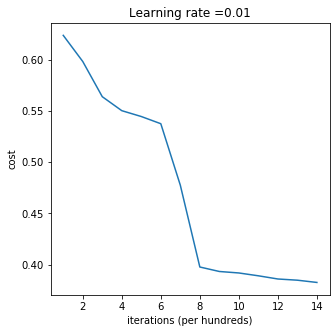

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [61]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

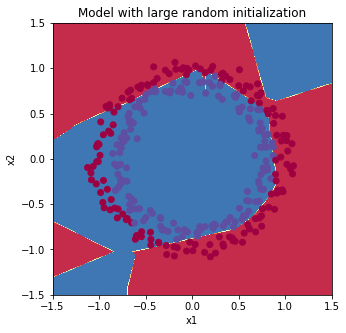

In [62]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

# Random initialization  35000 iterations

C:\Users\Hamid\Documents\2019\@andrew\ver2\deep2\deep-learning-specialization-coursera-master\02-Improving-Deep-Neural-Networks\week1\Programming-Assignments\Initialization\functions.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\Hamid\Documents\2019\@andrew\ver2\deep2\deep-learning-specialization-coursera-master\02-Improving-Deep-Neural-Networks\week1\Programming-Assignments\Initialization\functions.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6235719528716395
Cost after iteration 2000: 0.5980821226022246
Cost after iteration 3000: 0.5637996692567824
Cost after iteration 4000: 0.5501754102867465
Cost after iteration 5000: 0.5444767640123352
Cost after iteration 6000: 0.5374657035647926
Cost after iteration 7000: 0.4775406670630984
Cost after iteration 8000: 0.39784053325714386
Cost after iteration 9000: 0.3934817369887478
Cost after iteration 10000: 0.39203280921110983
Cost after iteration 11000: 0.38927347547167324
Cost after iteration 12000: 0.3861625886188003
Cost after iteration 13000: 0.38499044850062425
Cost after iteration 14000: 0.38279756848782404
Cost after iteration 15000: 0.38107190005592234
Cost after iteration 16000: 0.3799693664412435
Cost after iteration 17000: 0.3791385310023862
Cost after iteration 18000: 0.3746078296618408
Cost after iteration 19000: 0.3716638139946944
Cost after iteration 20000: 0.369960670330224
Cost after iteration 21000: 0.363196

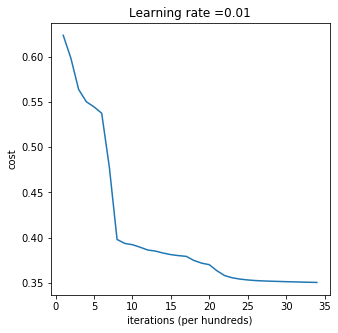

On the train set:
Accuracy: 0.8533333333333334
On the test set:
Accuracy: 0.84


In [64]:
parameters = model(train_X, train_Y,num_iterations = 35000, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

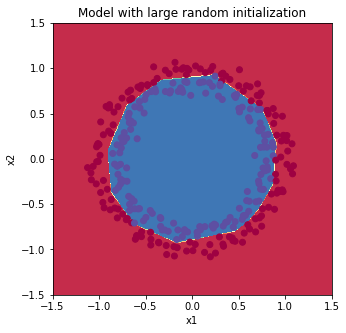

In [49]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## He initialization  with 15000 iterations
"He Initialization"; this is named for the first author of He et al., 2015. (If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])` where He initialization would use `sqrt(2./layers_dims[l-1])`.)


 

In [44]:
## Zero initialization
def initialize_parameters_he(layers_dims):    
    np.random.seed(3)  
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * (np.sqrt(2./layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071795
Cost after iteration 7000: 0.31178034648444414
Cost after iteration 8000: 0.23696215330322565
Cost after iteration 9000: 0.18597287209206842
Cost after iteration 10000: 0.15015556280371808
Cost after iteration 11000: 0.12325079292273552
Cost after iteration 12000: 0.09917746546525931
Cost after iteration 13000: 0.08457055954024274
Cost after iteration 14000: 0.07357895962677365


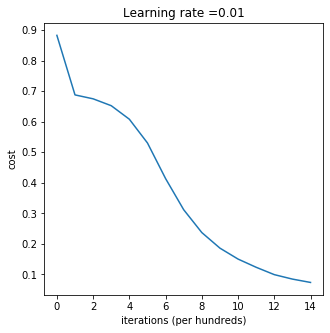

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [45]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

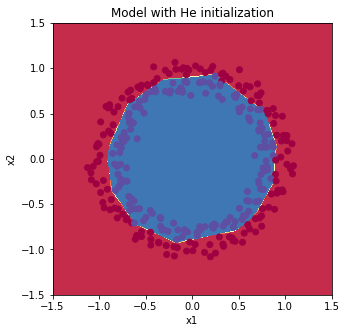

In [46]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## Result and disscussion:

Our resluts indicates that the methode of initialization can speed up our calculations. When we use the random W  we need 30000 sptes for the convergance of the resluts. But if we use the He formulation we can converge with half of the steps. 